1. Описание проекта

2. Загрузка данных. Изучение и предобработка данных
    - Проверка пропусков и типов данных. Корректировка.
    - Обработка дубликатов (явные и неявные).
    - Посчитаем и добавим в таблицу дополнительные столбцы: выручка, месяц и год заказа.
3. Исследовательский анализ данных
    - Посмотрим распределение цен на товары.
    - Оценим, в какие дни наибольшая выручка.
    - Проведем категоризацию столбца product. Лемматизация.
    - Исследуем соотношение товарных категорий по количеству проданных товаров. Построим график.
    - Исследуем соотношение товарных категорий по выручке от продаж. Построим график.
    - Проведем кластеризацию столбца quantity и price. 
    
4. Сформулируем и проверим статистические гипотезы

5. Основные выводы. Рекомендации

6. Построение дашбордов

7. Презентация





## Описание проекта

Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. Мы поможем нашему магазину стать лучше, а клиентам — обустроить дом своей мечты. Наши ближайшая задача — анализ товарного ассортимента. Для этого нам необходимо:
 - Провести исследовательский анализ данных;
 - Проанализировать товарный ассортимент;
 - Сформулировать и проверить статистические гипотезы;
 - Подготовить презентацию по итогам исследования.


Описание данных:
   - date — дата заказа;
   - customer_id — идентификатор покупателя;
   - order_id — идентификатор заказа;
   - product — наименование товара;
   - quantity — количество товара в заказе;
   - price — цена товара.


## Загрузка данных. Изучение и предобработка данных

### Проверка пропусков и типов данных

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from pandas import option_context
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
from pymystem3 import Mystem
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats as st

In [2]:
# читаем файл и сохраняем его в переменной df
df = pd.read_csv('/datasets/ecommerce_dataset.csv')
# выведем на экран первые 20 строк таблицы
display(df.head(20))

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


Выведем на экран размер файла и информацию о нем

In [3]:
print(df.shape)
print(df.info())

(6737, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB
None


In [4]:
# проверим пропуски
df.isna().mean()*100

date           0.0
customer_id    0.0
order_id       0.0
product        0.0
quantity       0.0
price          0.0
dtype: float64

Видим, что в таблице 6737 строк, пропущенных значений нет. Столбец с датой имеет неверный формат, необходимо будет привести к формату datetime. 

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB
None


In [6]:
df

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


Теперь данные во всех столбцах имеют верный тип. перейдем к обработке дубликатов

### Обработка дубликатов

In [7]:
#посчитаем количество явных дубликатов
df.duplicated().sum()

0

Видим, что явных дубликатов в файле нет. Возможно наличие неявных дубликатов. Посмотрим количество дубликатов когда все данные одинаковые, кроме id покупателя. Т.е. если одинаковые дата и время заказа, id заказа, товар и его количество, то, скорее всего, просто ошибка в id покупателя. 

In [8]:
sum(df[['date', 'order_id', 'product', 'quantity', 'price']].duplicated())

1

Обнаружен один такой дубликат. Посмотрим на эти строки

In [9]:
df[df.duplicated(subset=['date', 'order_id', 'product', 'quantity', 'price'], keep=False)]

,date,customer_id,order_id,product,quantity,price
4297,2019-06-02 10:00:00,f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0
4298,2019-06-02 10:00:00,95872093-2887-4ce8-8468-19234990e7d7,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0


Да, похоже это действительно ошибка в данных. Удалим дублирующую строку

In [10]:
df = df.drop_duplicates(subset=['date', 'order_id', 'product', 'quantity', 'price'], keep='last') 

Теперь посмотрим, есть ли дубликаты, когда значения во всех столбцах одинаковые, кроме даты. Например, если возникает ситуация, что id покупателя, id заказа одинаковые, набор купленных товаров по количеству и цене одинаков, то возможно это сбой программы

In [11]:
sum(df[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated())

1864

Слишком много таких строк, почти 28% от всего датасета. Посмотрим на них

In [12]:
df[df.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], keep=False)]

,date,customer_id,order_id,product,quantity,price
15,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.0
16,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.0
17,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.0
18,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
19,2018-10-01 21:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
...,...,...,...,...,...,...
6716,2019-10-30 07:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6717,2019-10-30 09:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


Ну да, похоже на ошибки. заказы полностью идентичны. Перед удалением еще раз убедимся, что номер заказа действитедублировался для одного покупателя в разные даты.

In [13]:
display(df.groupby(['customer_id', 'order_id']).agg({'date':'nunique'}).sort_values(by='date', ascending=False))

,,date
customer_id,order_id,
1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,74
57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,60
8c290149-ad54-4d7a-87a7-9386b36390ee,69162,23
ae6940d3-a1c7-4997-8853-a5b8afc60d51,71148,16
63b6c7b2-f6c2-4a42-ba02-1910ec67f57e,70419,10
...,...,...
5f75c73a-1305-4079-b040-2bcb42085002,68509,1
5f7bbd5a-26dc-48ba-bcd8-19560f880fd3,71877,1
5fa9bbd0-f5b2-47e6-ad5d-a38c6e69c9b2,14527,1


Действительно получается странная ситуация: заказ под одним и тем же номером у одного покупателя повторяется до 74 раз! Для примера посмотрим на некоторые из таких покупателей

In [14]:
display(df.query('customer_id == "1d6c8c1f-a799-4418-9af2-1ded47d7a85c"'))
display(df.query('customer_id == "8c290149-ad54-4d7a-87a7-9386b36390ee"'))
display(df.query('customer_id == "eb04c06f-bee9-45bd-9392-4addbc54952f"'))
display(df.query('customer_id == "bfacecbe-1f6c-435b-996c-a812f988cf65"'))

,date,customer_id,order_id,product,quantity,price
4157,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0
4158,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0
4159,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",1,120.0
4160,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,1,120.0
4161,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,1,120.0
...,...,...,...,...,...,...
5540,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,1,120.0
5541,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0
5542,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт Диск, кассета по 6шт",1,120.0
5543,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.0


,date,customer_id,order_id,product,quantity,price
1043,2018-12-01 12:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
1045,2018-12-01 18:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
1046,2018-12-01 20:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
1047,2018-12-01 22:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
1054,2018-12-02 14:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
1091,2018-12-03 19:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
1130,2018-12-07 20:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
1133,2018-12-08 18:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
1135,2018-12-08 21:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0
1136,2018-12-09 13:00:00,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0


,date,customer_id,order_id,product,quantity,price
1319,2018-12-23 12:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Плед флисовый 200х150 см WELLNESS WPLNY152-Зим...,1,712.0
1325,2018-12-23 15:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Плед флисовый 200х150 см WELLNESS WPLNY152-Зим...,1,712.0
1340,2018-12-24 09:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Плед флисовый 200х150 см WELLNESS WPLNY152-Зим...,1,712.0
1351,2018-12-24 20:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Лестница-стремянка Dogrular Ufuk оцинкованная ...,1,1649.0
1357,2018-12-25 17:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Лестница-стремянка Dogrular Ufuk оцинкованная ...,1,1649.0
1358,2018-12-25 19:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Лестница-стремянка Dogrular Ufuk оцинкованная ...,1,1649.0
1360,2018-12-25 21:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Лестница-стремянка Dogrular Ufuk оцинкованная ...,1,1649.0
1380,2018-12-26 17:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Лестница-стремянка Dogrular Ufuk оцинкованная ...,1,1649.0
1434,2019-01-03 22:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Лестница-стремянка Dogrular Ufuk оцинкованная ...,1,1649.0


,date,customer_id,order_id,product,quantity,price
2590,2019-04-01 18:00:00,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,Штора для ванной комнаты 240х200 Verga белая т...,1,1162.0
2759,2019-04-09 15:00:00,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,Штора для ванной комнаты 240х200 Verga белая т...,1,1162.0
2792,2019-04-11 00:00:00,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,Штора для ванной комнаты 240х200 Verga белая т...,1,1162.0
2796,2019-04-11 11:00:00,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,Штора для ванной комнаты 240х200 Verga белая т...,1,1162.0
2798,2019-04-11 13:00:00,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,Штора для ванной комнаты 240х200 Verga белая т...,1,1162.0
2822,2019-04-13 23:00:00,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,Штора для ванной комнаты 240х200 Verga белая т...,1,1162.0
2987,2019-04-20 21:00:00,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,Штора для ванной комнаты 240х200 Verga белая т...,1,1162.0
3038,2019-04-23 01:00:00,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,Штора для ванной комнаты 240х200 Verga белая т...,1,1162.0


Получается странная ситуация, заказы идентичны и повторяются в разные даты. Удалим все дублирующие строки и посмотрим на результат

In [15]:
df = df.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], keep='last') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4872 non-null   datetime64[ns]
 1   customer_id  4872 non-null   object        
 2   order_id     4872 non-null   int64         
 3   product      4872 non-null   object        
 4   quantity     4872 non-null   int64         
 5   price        4872 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 266.4+ KB


Удалили 1865 строк, осталось 4872. Теперь перейдем к добавлению нужных нам для анализа столбцов

### Добавление дополнительных столбцы: выручка, месяц и год заказа

In [16]:
#добавляем столбец с выручкой по заказу
df['revenue'] = df['price'] * df['quantity']

Добавим также столбцы с днем недели, месяцем и годом для каждого заказа. Для этого применим методы .weekday (возвращает дни недели по индексам: понедельник - 0, воскресенье - 6), .month, .year соответственно к столбцу date

In [17]:
df['weekday'] = pd.DatetimeIndex(df['date']).weekday
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df.head(10)

,date,customer_id,order_id,product,quantity,price,revenue,weekday,month,year
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,0,10,2018
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,0,10,2018
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,0,10,2018
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,0,10,2018
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,0,10,2018
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,164.0,0,10,2018
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0,0,10,2018
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0,0,10,2018
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0,269.0,0,10,2018
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,674.0,0,10,2018


### Исследование аномальных значений

In [18]:
#выведем статистику методом describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,4872.0,48226.496921,27342.110803,12624.0,14775.5,68860.0,70832.25,73164.0
quantity,4872.0,2.837849,17.608600,1.0,1.0,1.0,1.00,1000.0
price,4872.0,514.817118,944.540745,9.0,90.0,150.0,488.00,14917.0
revenue,4872.0,850.157430,9808.310056,9.0,120.0,194.0,734.00,675000.0
weekday,4872.0,2.617406,1.967131,0.0,1.0,2.0,4.00,6.0
month,4872.0,6.516010,3.291764,1.0,4.0,6.0,10.00,12.0
year,4872.0,2018.748768,0.433766,2018.0,2018.0,2019.0,2019.00,2019.0


Видим, что в 75% заказов всего один товар, среднее количество товаров в заказе - около трех, максимальное - 1000 штук. Минимальная цена товаров - 9 руб., максимальная 14917 руб., средняя 515 руб. Максимальная выручка по заказу 675000 руб., средняя 850 руб., минимальная 9 руб. Не будем ничего делать с аномальными значениями, это могут быть оптовики.

Все, наш датасет готов, переходим к анализу данных

## Исследовательский анализ данных

### Период анализа. Сезонность продаж. Выручка и средний чек

Посмотрим, за какой период мы быдем исследовать данные

In [19]:
print('Дата первого заказа:', df['date'].min())
print('Дата последнего заказа:', df['date'].max())
print('Анализируемый период:', df['date'].max() - df['date'].min())

Дата первого заказа: 2018-10-01 00:00:00
Дата последнего заказа: 2019-10-31 16:00:00
Анализируемый период: 395 days 16:00:00


Таким образом, мы располагаем данными за 395 дней (13 месяцев) с 1 октября 2018г. до 31 октября 2019 года. Теперь посмотрим ,в какое время года наибольшие продажи в стоимостном и количественном выражении. Сначала сгруппируем данные по столбцу month	и year, найдем количество проданных товаров в каждой группе. Для наглядности построим столбчатую диаграмму.

In [20]:
df_period = df.groupby(['month', 'year'])['quantity'].agg(['sum']).sort_values(by='year').reset_index()
df_period

,month,year,sum
0,10,2018,1554
1,11,2018,1240
2,12,2018,999
3,1,2019,638
4,2,2019,973
5,3,2019,1089
6,4,2019,1459
7,5,2019,1517
8,6,2019,1990
9,7,2019,556


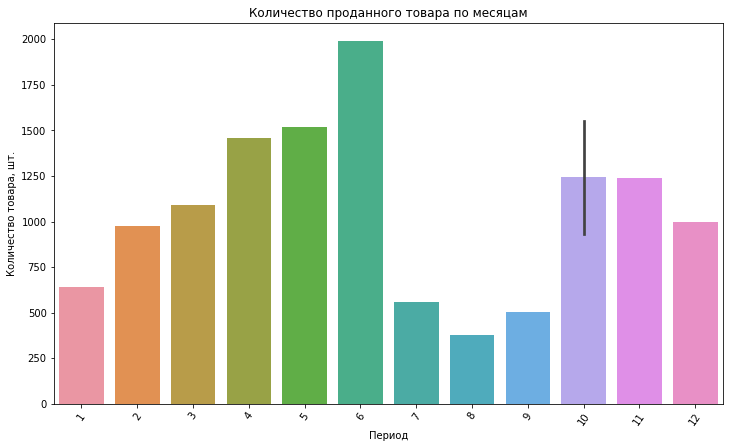

In [21]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df_period, x='month', y='sum')
plt.title('Количество проданного товара по месяцам')
plt.xlabel('Период')
plt.ylabel('Количество товара, шт.')
plt.xticks(rotation = 55)
plt.show()


Видим, что наибольшее количество товаров продается в период с марта по июнь, т.е. в период весенней уборки домов и подготовки к летнему сезону. Значительное количество товаров было продано в декабре перед Новым Годом. В то же время, наблюдается нехорошая тенденция спада продаж в октябре 2019 года (932 шт.) по сравнению с октябрем 2018 (1554 шт.). Посмотрим эти тенденции по выручке 

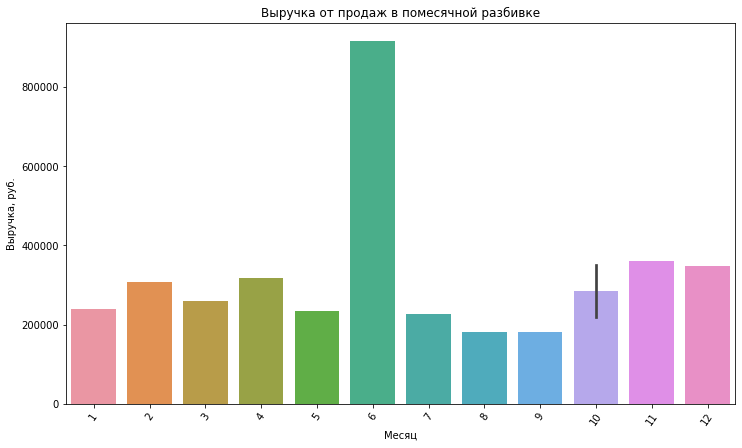

,month,year,sum
0,10,2018,351122.0
1,11,2018,359772.0
2,12,2018,348630.0
3,1,2019,239608.0
4,2,2019,307737.0
5,3,2019,258968.0
6,4,2019,317394.0
7,5,2019,234297.0
8,6,2019,916390.0
9,7,2019,226600.0


In [22]:
df_period_revenue = df.groupby(['month', 'year'])['revenue'].agg(['sum']).sort_values(by='year').reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(data=df_period_revenue, x='month', y='sum')
plt.title('Выручка от продаж в помесячной разбивке')
plt.xlabel('Месяц')
plt.ylabel('Выручка, руб.')
plt.xticks(rotation = 55)
plt.show()
df_period_revenue

В денежном выражении ситуация несколько иная. Наибольшая выручка в июне, скорее всего, это связано с началом дачного сезона.А вот март и май, которые были в числе лидеров по количеству проданных товаров, в рублях показывают слабые результаты. Скорее всего, это связано с тем, что в этот период продаются дешевые товары, напр., рассада. Проверим наше предположение на графике среднего чека. Для расчета среднего чека разделим общую выручку в месяц на количество заказов в месяц

In [23]:
#найдем количество заказов по месяцам
order_sum = df.groupby(['month', 'year']).agg({'order_id':'nunique'}).sort_values(by='year').reset_index()
order_sum


,month,year,order_id
0,10,2018,238
1,11,2018,204
2,12,2018,281
3,1,2019,170
4,2,2019,289
5,3,2019,249
6,4,2019,266
7,5,2019,182
8,6,2019,165
9,7,2019,197


In [24]:
df_period_revenue['avg_chek'] = (df_period_revenue['sum'] / order_sum['order_id']).round(2)
df_period_revenue

,month,year,sum,avg_chek
0,10,2018,351122.0,1475.30
1,11,2018,359772.0,1763.59
2,12,2018,348630.0,1240.68
3,1,2019,239608.0,1409.46
4,2,2019,307737.0,1064.83
5,3,2019,258968.0,1040.03
6,4,2019,317394.0,1193.21
7,5,2019,234297.0,1287.35
8,6,2019,916390.0,5553.88
9,7,2019,226600.0,1150.25


Построим графики изменения среднего чека и количества заказов по времени

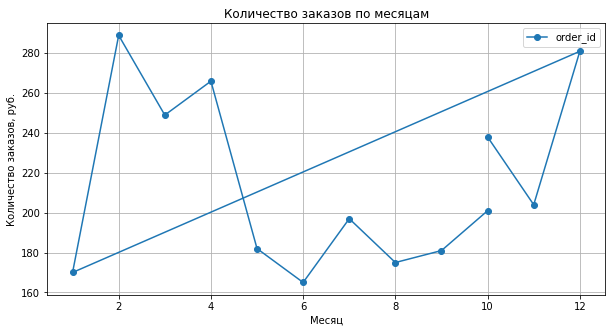

In [25]:
order_sum.plot(x='month', y='order_id', style='o-', figsize=(10,5), grid=True)
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов, руб.')
plt.show()

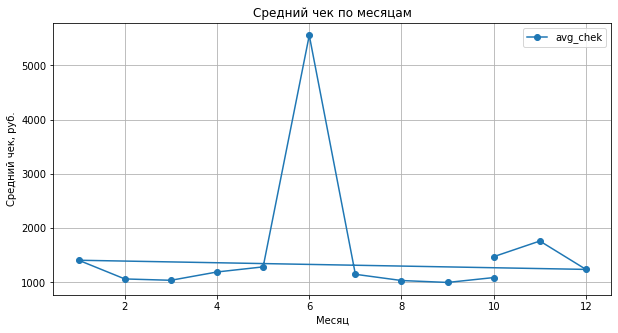

In [26]:
df_period_revenue.plot(x='month', y='avg_chek', style='o-', figsize=(10,5), grid=True)
plt.title('Средний чек по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средний чек, руб.')
plt.show()

Таким образом, если не считать июня с максимальным средним чеком, то наибольший средний чек был в октябре-ноябре 2018 года. И к октябрю 2019 года он медленно снижается (с 1475 руб. до 1090 руб.). Очень нехорошая тенденция, надо будет поработать со средним чеком, например, предлагать людям сопутствующие товары. Количество заказов также снизилось в октябре 2019г. по сравнению с октябрем 2018г. (с 238 до 201). В целом количество заказом стандартно повышается перед Новым Годом и в феврале-апреле.  

Теперь изучим, в какие дни недели наибольшая выручка

In [27]:
weekday_revenue = df.groupby(['weekday']).agg({'revenue':'sum'}).reset_index()
weekday_revenue

,weekday,revenue
0,0,594987.0
1,1,1354208.0
2,2,518276.0
3,3,546615.0
4,4,512713.0
5,5,265054.0
6,6,350114.0


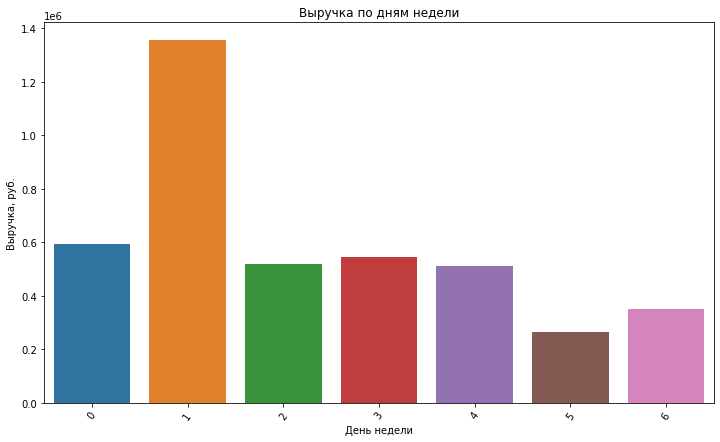

In [28]:
plt.figure(figsize=(12, 7))
sns.barplot(data=weekday_revenue, x='weekday', y='revenue')
plt.title('Выручка по дням недели')
plt.xlabel('День недели')
plt.ylabel('Выручка, руб.')
plt.xticks(rotation = 55)
plt.show()


Таким образом, наибольшую выручку магазин получает по вторникам, наименьшую - в субботую Необходимо это будет учитывать при планировании рекламной кампании

### Исследование покупательской активности

Найдем общее количество покупателей, посчитаем количество заказов по покупателям

In [29]:
customers_sum = len(df['customer_id'].unique())
print('Общее количество покупателей за 13 месяцев:', customers_sum)

Общее количество покупателей за 13 месяцев: 2450


In [30]:
customers_orders = df.groupby('customer_id').agg({'order_id':'nunique'}).sort_values(by='order_id').reset_index()
customers_orders

,customer_id,order_id
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1
1,aae3b3d2-8ab8-4558-a141-e23f0b77e63d,1
2,ab10dfb3-1f3e-4712-972a-729f5cec2eb2,1
3,ab46eafd-f9d3-4f91-af42-794d675d9c0c,1
4,ab938608-1b5b-4830-9fc0-dfc649c04b2f,1
...,...,...
2445,0184f535-b60a-4914-a982-231e3f615206,5
2446,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
2447,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
2448,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35


Видим, что большинство пользователей сделали по одному заказу. Пользователей, сдлелавших 2 и более заказа, очень мало. Чтобы понять, 2-3 заказа - это аномалия или нет, посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя.


In [31]:
print(np.percentile(customers_orders['order_id'], [95, 99])) 

[2. 3.]


Таким образом, не более 5% пользователей оформляли 2 заказа. И не более 1% пользователей заказывали более трех раз. Получается, что пользователи, сделавшие первый заказ в магазине, очень редко возвращаются в этот магазин за покупками. Необходимо будет поработать с конверсией, делать скидки на товары в зависимости от количества заказов


### Изучение товарного ассортимента

Изучим данные столбца product. Посмотрим, какие товары покупаются

In [32]:
pd.set_option('display.max_rows', None)
df['product'].value_counts()

Пеларгония розебудная Red Pandora укорененный черенок                                                                               66
Пеларгония розебудная Prins Nikolai укорененный черенок                                                                             57
Пеларгония зональная диам. 12 см сиреневый полумахровый                                                                             52
Сумка-тележка 2-х колесная Gimi Argo синяя                                                                                          47
Пеларгония розебудная Mary укорененный черенок                                                                                      39
Пеларгония розебудная Queen Ingrid укорененный черенок                                                                              30
Пеларгония розебудная Margaretha укорененный черенок                                                                                29
Пеларгония зональная диам. 12 см коралловая полумахрова

Посмотрим, какое количество одного наименования товара покупается за один заказ

In [33]:
display(df[['order_id', 'product', 'quantity']].sort_values(by='quantity', ascending=False))

,order_id,product,quantity
5456,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000
5071,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334
3961,71478,Муляж ЯБЛОКО 9 см красное,300
1158,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200
568,68815,Муляж ЯБЛОКО 9 см красное,170
266,68611,"Крепеж для пружины дверной, 1107055",150
267,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150
2431,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150
586,68831,Муляж ЯБЛОКО 9 см красное,140
1555,69893,Щетка для мытья посуды КОЛИБРИ М5202 большая,100


Посмотрим для интереса на заказ, в котором купили 1000 вантузов

In [34]:
display(df.query('order_id == 71743'))

,date,customer_id,order_id,product,quantity,price,revenue,weekday,month,year
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,675000.0,1,6,2019


Скорее всего, все, кто покупает более трех штук одного наименования товара (за исключением рассады) - это оптовики. Найдем ТОП-10 товаров, которые за исследуемый период купили чаще всего.

In [35]:
top_product = df.query('order_id != 71743')
top_product = top_product.groupby('product')['quantity'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)
top_product = top_product.head(10)
top_product

,product,sum
835,Муляж ЯБЛОКО 9 см красное,618
191,Вешалки мягкие для деликатных вещей 3 шт шоколад,335
837,Муляж Яблоко зеленый 9 см полиуретан,308
1453,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200
663,"Крепеж для пружины дверной, 1107055",170
1114,Плечики пластмассовые Размер 52 - 54 Тула 1205158,160
1199,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150
777,Муляж Банан желтый 21 см полиуретан,109
2240,Щетка-сметка 4-х рядная деревянная 300 мм (фиг...,105
7,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",103


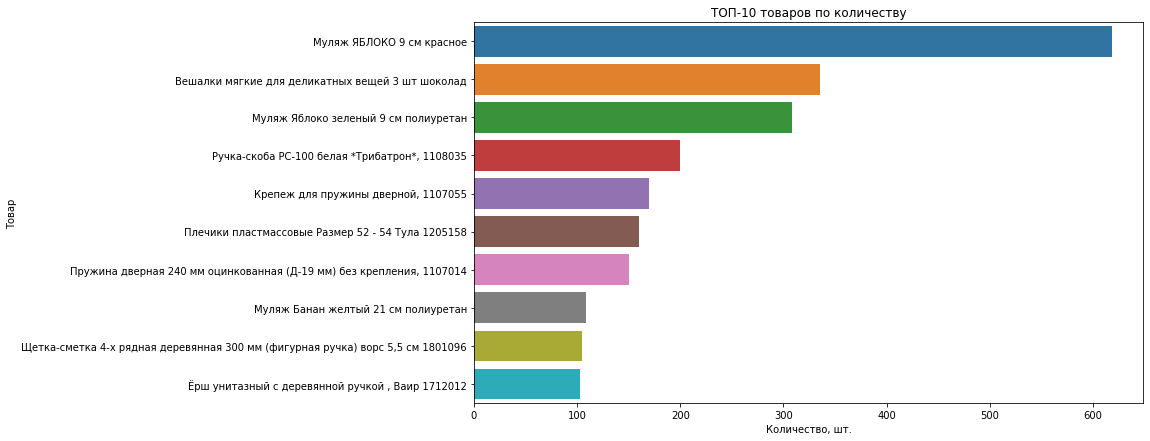

In [36]:
plt.figure(figsize=(12, 7))
sns.barplot(data=top_product, x='sum', y='product')
plt.title('ТОП-10 товаров по количеству')
plt.xlabel('Количество, шт.')
plt.ylabel('Товар')
plt.show()


Таким образом, бестселлерами по количеству проданных единиц выступают: вешалки-плечики, муляжи фруктов, крепежи и пружины для дверей, щетки-сметки деревянные, ершики. Теперь посмотрим, какие товары приносят наибольшую выручку

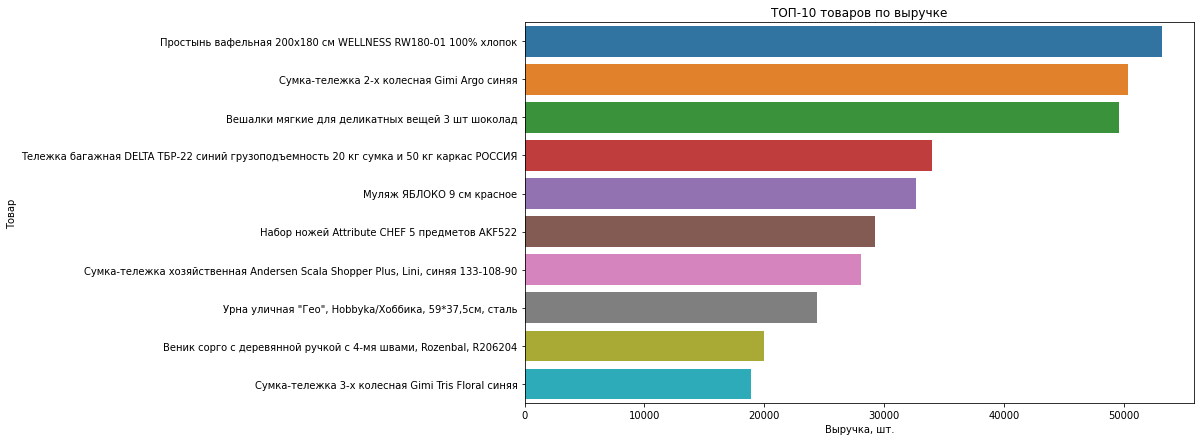

In [37]:
top_product_revenue = df.query('order_id != 71743')
top_product_revenue = top_product_revenue.groupby('product')['revenue'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)
top_product_revenue = top_product_revenue.head(10)
plt.figure(figsize=(12, 7))
sns.barplot(data=top_product_revenue, x='sum', y='product')
plt.title('ТОП-10 товаров по выручке')
plt.xlabel('Выручка, шт.')
plt.ylabel('Товар')
plt.show()

Лидером по выручке является вафельная простынь 2000х180. В ТОП-10 товаров по выручке также входят сумки-тележки, вешалки-плечики мягкие, фруктовые муляжи, веники, урны. Посмотрим распределение цен на товары.

In [38]:
display(df.groupby(['product', 'price'])['price'].agg(['count']).sort_values(by='price', ascending=False))

,,count
product,price,
Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,14917.0,1
"Сумка-тележка хозяйственная Andersen Royal Shopper, Hera, синяя 166-004-90",8737.0,1
"Сумка-тележка хозяйственная Andersen Alu Star Shopper, Hava, синяя 115-103-90",8437.0,1
Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная,8077.0,1
Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 см алюминиевая с лотком для инструментов,7724.0,1
Сумка-тележка хозяйственная Rolser MNB017 fucsia LOGIC DOS+2 фуксия,7679.0,1
Сумка-тележка хозяйственная Rolser IMX006 bassi Logic Tour бордовая,7679.0,1
Сумка-тележка хозяйственная Rolser MOU041 malva RD6 сиреневая,7597.0,1
Гладильная доска Leifheit AirBoard Compact M Plus 120х38 см малиновый 71630,7424.0,1


Не обнаружила каких-либо аномальных цен. Есть незначительные отклонения в ценах на одни и те же товары. Но считаю это вполне нормальным (напр., скидки в конкретный день, разный % скидок у разных покупателей и т.д.)

### Категоризация столбца product

Категоризацию проведем по следующему алгоритму:
- из столбца product выберем вручную ключи для категорий
- определим категории, применим лемматизацию
- создадим функцию для присвоения товару той или иной категории

Исходя из анализа столбца product можно разделить товары на следующие категории:
- 	рассада плодовых культур,
-	цветы,
-	хозяйственные товары,
-   мебель,
-	товары для дома,
-	гигиена,
-   посуда,
-   бытовая техника,
-   прочие


Для дальнейшей категоризации нам нужно составить словарь из лемм. 

In [39]:
#df['product'] = df['product'].str.lstrip()


In [40]:
# напишем функцию лемматизации, которую применим к столбцу product
m = Mystem()
def category_product(row):
    lem_purpose = m.lemmatize(row['product'])
    if ('огурец' in lem_purpose) or ('чабер' in lem_purpose) or ('перец' in lem_purpose) or ('лавр' in lem_purpose) or ('томат' in lem_purpose) or ('укроп' in lem_purpose) or ('помидор' in lem_purpose) or ('виноград' in lem_purpose) or ('горох' in lem_purpose) or ('морковь' in lem_purpose) or ('лук' in lem_purpose) or ('бальзамин' in lem_purpose) or ('тимьян' in lem_purpose) or ('мелисса' in lem_purpose) or ('подсолнечник' in lem_purpose) or ('розмарин' in lem_purpose) or ('кориандр' in lem_purpose) or ('душица' in lem_purpose) or ('салат' in lem_purpose) or ('виноград' in lem_purpose) or ('зелень' in lem_purpose) or ('мята' in lem_purpose) or ('базилик' in lem_purpose) or ('капуста' in lem_purpose) or ('арбуз' in lem_purpose) or ('дыня' in lem_purpose) or ('патиссон' in lem_purpose) or ('сельдерей' in lem_purpose) or ('петрушка' in lem_purpose) or ('баклажан' in lem_purpose) or ('клубника' in lem_purpose) or ('тыква' in lem_purpose) or ('кабачок' in lem_purpose) or ('розмарин' in lem_purpose) or ('земляника' in lem_purpose):
        return 'рассада'
    if ('сумка' in lem_purpose) or ('тряпка' in lem_purpose) or ('прищепка' in lem_purpose) or ('стяжка' in lem_purpose) or ('кондиционер' in lem_purpose) or ('перчатка' in lem_purpose) or ('пятно' in lem_purpose) or ('мытья' in lem_purpose) or ('веревка' in lem_purpose) or ('совок' in lem_purpose) or ('губка' in lem_purpose) or ('чистка' in lem_purpose) or ('ополаскиватель' in lem_purpose) or ('прищепок' in lem_purpose) or ('короб' in lem_purpose) or ('засор' in lem_purpose) or ('шпагат' in lem_purpose) or ('мешок' in lem_purpose) or ('моп' in lem_purpose) or ('веник' in lem_purpose) or ('перчатки' in lem_purpose) or ('шнур' in lem_purpose) or ('корзина' in lem_purpose) or ('швабра' in lem_purpose) or ('крючок' in lem_purpose) or ('крепеж' in lem_purpose) or ('ведро' in lem_purpose) or ('стремянка' in lem_purpose) or ('корыто' in lem_purpose) or ('тележка' in lem_purpose) or ('сушилка' in lem_purpose) or ('лестница' in lem_purpose) or ('щетка' in lem_purpose):
        return 'хозяйственные товары'
    if ('полка' in lem_purpose) or ('обувница' in lem_purpose) or ('стеллаж' in lem_purpose) or ('комод' in lem_purpose):
        return 'мебель'
    if ('салатник' in lem_purpose) or ('масленка' in lem_purpose) or ('термостакан' in lem_purpose) or ('посуда' in lem_purpose) or ('чайник' in lem_purpose) or ('чайный' in lem_purpose) or ('противень' in lem_purpose) or ('термокружка' in lem_purpose) or ('сито' in lem_purpose) or ('бульонница' in lem_purpose) or ('сито' in lem_purpose) or ('бульонница' in lem_purpose) or ('рыбочистка' in lem_purpose) or ('картофелемялка' in lem_purpose) or ('венчик' in lem_purpose) or ('разделочный' in lem_purpose) or ('салфетница' in lem_purpose) or ('толкушка' in lem_purpose) or ('сотейник' in lem_purpose) or ('тортница' in lem_purpose) or ('хлебница' in lem_purpose) or ('кондитерский' in lem_purpose) or ('просеиватель' in lem_purpose) or ('половник' in lem_purpose) or ('сахарница' in lem_purpose) or ('бидон' in lem_purpose) or ('миска' in lem_purpose) or ('кастрюля' in lem_purpose) or ('ковш' in lem_purpose) or ('стакан' in lem_purpose) or ('ложка' in lem_purpose) or ('блюдце' in lem_purpose) or ('термос' in lem_purpose) or ('овощечистка' in lem_purpose) or ('холодец' in lem_purpose) or ('терка' in lem_purpose) or ('бокал' in lem_purpose) or ('кружка' in lem_purpose) or ('сковорода' in lem_purpose) or ('фужер' in lem_purpose) or ('кувшин' in lem_purpose) or ('нож' in lem_purpose) or ('блюдо' in lem_purpose) or ('чай' in lem_purpose) or ('тарелка' in lem_purpose) or ('банка' in lem_purpose) or ('вилка' in lem_purpose):
        return 'посуда'
    if ('электрический' in lem_purpose) or ('соковыжималка' in lem_purpose) or ('фен' in lem_purpose) or ('светильник' in lem_purpose) or ('кипятильник' in lem_purpose) or ('соковарка' in lem_purpose) or ('утюг' in lem_purpose) or ('мантоварка' in lem_purpose) or ('миксер' in lem_purpose) or ('электроштопор' in lem_purpose) or ('пылесос' in lem_purpose) or ('измельчитель' in lem_purpose) or ('овощеварка' in lem_purpose) or ('весы' in lem_purpose):
        return 'бытовая техника'
    if ('паста' in lem_purpose) or ('мыло' in lem_purpose) or ('пена' in lem_purpose) or ('маска' in lem_purpose) or ('стиральный' in lem_purpose) or ('маска' in lem_purpose):
        return 'гигиена и красота'
    if ('доска' in lem_purpose) or ('ножеточка' in lem_purpose) or ('чехол' in lem_purpose) or ('коробка' in lem_purpose) or ('искусственный' in lem_purpose) or ('таз' in lem_purpose) or ('дозатор' in lem_purpose) or ('наволочка' in lem_purpose) or ('ваза' in lem_purpose) or ('корзинка' in lem_purpose) or ('халат' in lem_purpose) or ('одеяло' in lem_purpose) or ('фоторамка' in lem_purpose) or ('подрукавник' in lem_purpose) or ('подрукавник' in lem_purpose) or ('ножницы' in lem_purpose) or ('унитаз' in lem_purpose) or ('ключница' in lem_purpose) or ('простыня' in lem_purpose) or ('наматрасник' in lem_purpose) or ('белье' in lem_purpose) or ('туалет' in lem_purpose) or ('ванна' in lem_purpose) or ('антинакипин' in lem_purpose) or ('бак' in lem_purpose) or ('подушка' in lem_purpose) or ('налет' in lem_purpose) or ('антижир' in lem_purpose) or ('покрывало' in lem_purpose) or ('вантуз' in lem_purpose) or ('сетка' in lem_purpose) or ('простынь' in lem_purpose) or ('кисточка' in lem_purpose) or ('подголовник' in lem_purpose) or ('ящик' in lem_purpose) or ('этажерка' in lem_purpose) or ('скалка' in lem_purpose) or ('дозатор' in lem_purpose) or ('матрас' in lem_purpose) or ('стремянка' in lem_purpose) or ('рукав' in lem_purpose) or ('пепельница' in lem_purpose) or ('полотенце' in lem_purpose) or ('новогодний' in lem_purpose) or ('крючок' in lem_purpose) or ('плечики' in lem_purpose) or ('ковер' in lem_purpose) or ('плед' in lem_purpose) or ('сушилка' in lem_purpose) or ('скатерть' in lem_purpose) or ('подставка' in lem_purpose) or ('кофр' in lem_purpose) or ('штанга' in lem_purpose) or ('сиденье' in lem_purpose) or ('салфетка' in lem_purpose) or ('муляж' in lem_purpose) or ('вешалка' in lem_purpose) or ('ерш' in lem_purpose) or ('контейнер' in lem_purpose) or ('карниз' in lem_purpose) or ('термометр' in lem_purpose) or ('штора' in lem_purpose) or ('коврик' in lem_purpose) or ('кашпо' in lem_purpose):
        return 'товары для дома'
    if ('цветы' in lem_purpose) or ('нюрнберг' in lem_purpose) or ('растение' in lem_purpose) or ('крокус' in lem_purpose) or ('бакопа' in lem_purpose) or ('ранункулус' in lem_purpose) or ('гвоздик' in lem_purpose) or ('нефролепсис' in lem_purpose) or ('тюльпан' in lem_purpose) or ('ауреум' in lem_purpose) or ('седум' in lem_purpose) or ('спатифиллум' in lem_purpose) or ('гипсофила' in lem_purpose) or ('рубелла' in lem_purpose) or ('фиттония' in lem_purpose) or ('аптения' in lem_purpose) or ('крассула' in lem_purpose) or ('гвоздика' in lem_purpose) or ('эшшольция' in lem_purpose) or ('гарден' in lem_purpose) or ('мирт' in lem_purpose) or ('георгин' in lem_purpose) or ('цинерария' in lem_purpose) or ('мимоза' in lem_purpose) or ('саланум' in lem_purpose) or ('каллуна' in lem_purpose) or ('капсикум' in lem_purpose) or ('энотера' in lem_purpose) or ('калоцефалус' in lem_purpose) or ('каланхое' in lem_purpose) or ('примула' in lem_purpose) or ('хлорофитум' in lem_purpose) or ('лаванда' in lem_purpose) or ('гербера' in lem_purpose) or ('роза' in lem_purpose) or ('молодило' in lem_purpose) or ('фиалка' in lem_purpose) or ('гербера' in lem_purpose) or ('примула' in lem_purpose) or ('пуансеттия' in lem_purpose) or ('мирт' in lem_purpose) or ('диффембахия' in lem_purpose) or ('фаленопсис' in lem_purpose) or ('иссоп' in lem_purpose) or ('сантолина' in lem_purpose) or ('азалия' in lem_purpose) or ('мирт' in lem_purpose) or ('хлорофитум' in lem_purpose) or ('цикламен' in lem_purpose) or ('калатея' in lem_purpose) or ('нолина' in lem_purpose) or ('эвкалипт' in lem_purpose) or ('кампанула' in lem_purpose) or ('суккулент' in lem_purpose) or ('эхеверия' in lem_purpose) or ('шеффлер' in lem_purpose) or ('юкка' in lem_purpose) or ('хризолидокарпус' in lem_purpose) or ('циперус' in lem_purpose) or ('радермахер' in lem_purpose) or ('бархатцы' in lem_purpose) or ('алиссум' in lem_purpose) or ('гвоздика' in lem_purpose) or ('колокольчик' in lem_purpose) or ('настурция' in lem_purpose) or ('хризантема' in lem_purpose) or ('пеларгония' in lem_purpose) or ('калибрахоа' in lem_purpose) or ('d12' in lem_purpose) or ('эшшольция' in lem_purpose) or ('ясколка' in lem_purpose) or ('цинния' in lem_purpose) or ('эхинацея' in lem_purpose) or ('хоста' in lem_purpose) or ('целозия' in lem_purpose) or ('флокс' in lem_purpose) or ('фуксия' in lem_purpose) or ('табак' in lem_purpose) or ('физостегия' in lem_purpose) or ('сальвия' in lem_purpose) or ('солидаго' in lem_purpose) or ('очаровашка' in lem_purpose) or ('остеоспермум' in lem_purpose) or ('рудбекия' in lem_purpose) or ('платикодон' in lem_purpose) or ('портулак' in lem_purpose) or ('петуния' in lem_purpose) or ('пиретрум' in lem_purpose) or ('папоротник' in lem_purpose) or ('пеларгония' in lem_purpose) or ('овсянница' in lem_purpose) or ('осина' in lem_purpose) or ('незабудка' in lem_purpose) or ('нивянник' in lem_purpose) or ('монарда' in lem_purpose) or ('Настурция' in lem_purpose) or ('любисток' in lem_purpose) or ('маттиола' in lem_purpose) or ('лобелия' in lem_purpose) or ('однолетний' in lem_purpose) or ('левкой' in lem_purpose) or ('лен' in lem_purpose) or ('лаватера' in lem_purpose) or ('камилла' in lem_purpose) or ('эхинокактус' in lem_purpose) or ('лапчатка' in lem_purpose) or ('калла' in lem_purpose) or ('кипарисовик' in lem_purpose) or ('кореопсис' in lem_purpose) or ('котовник' in lem_purpose) or ('колокольчик' in lem_purpose) or ('колеус' in lem_purpose) or ('король' in lem_purpose) or ('колокольчик' in lem_purpose) or ('клен' in lem_purpose) or ('кодонанта' in lem_purpose) or ('калла' in lem_purpose) or ('кипарисовик' in lem_purpose) or ('календула' in lem_purpose) or ('калибрахоа' in lem_purpose) or ('змееголовник' in lem_purpose) or ('гортензия' in lem_purpose) or ('душица' in lem_purpose) or ('пеперомия' in lem_purpose) or ('диффенбахия' in lem_purpose) or ('драцена' in lem_purpose) or ('ампельный' in lem_purpose) or ('гортензия' in lem_purpose) or ('зверобой' in lem_purpose) or ('змееголовник' in lem_purpose) or ('мединилла' in lem_purpose) or ('душица' in lem_purpose) or ('замиокулькас' in lem_purpose) or ('диффенбахия' in lem_purpose) or ('драцена' in lem_purpose) or ('декабрист' in lem_purpose) or ('дендробиум' in lem_purpose) or ('джункус' in lem_purpose) or ('гортензия' in lem_purpose) or ('годеция' in lem_purpose) or ('глоксиния' in lem_purpose) or ('черенок' in lem_purpose) or ('гипсофила' in lem_purpose) or ('гиацинт' in lem_purpose) or ('гимнокалициум' in lem_purpose) or ('герань' in lem_purpose) or ('гербера' in lem_purpose) or ('гардения' in lem_purpose) or ('гвоздика' in lem_purpose) or ('газания' in lem_purpose) or ('гайлардия' in lem_purpose) or ('лилиана' in lem_purpose) or ('виола' in lem_purpose) or ('вербена' in lem_purpose) or ('вероника' in lem_purpose) or ('валериана' in lem_purpose) or ('вербейник' in lem_purpose) or ('буддлея' in lem_purpose) or ('бузульник' in lem_purpose) or ('бархатцы' in lem_purpose) or ('бегония' in lem_purpose) or ('бальзамин' in lem_purpose) or ('барвинок' in lem_purpose) or ('бадан' in lem_purpose) or ('бакопа' in lem_purpose) or ('аспарагус' in lem_purpose) or ('афеляндра' in lem_purpose) or ('аптения' in lem_purpose) or ('полынь' in lem_purpose) or ('альбука' in lem_purpose) or ('амариллис' in lem_purpose) or ('анемона' in lem_purpose) or ('алиссум' in lem_purpose) or ('алоэ' in lem_purpose) or ('антуриум' in lem_purpose) or ('адиантум' in lem_purpose) or ('азалия' in lem_purpose) or ('аквилегия' in lem_purpose):
        return 'цветы'    
    return 'прочие'
df['product_category'] = df.apply(category_product, axis=1)

# убедимся, что функция сработала, посмотрим новый столбец product_category
display(df.head(20))

 

,date,customer_id,order_id,product,quantity,price,revenue,weekday,month,year,product_category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,0,10,2018,цветы
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,0,10,2018,цветы
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,0,10,2018,цветы
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,0,10,2018,цветы
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,0,10,2018,цветы
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,164.0,0,10,2018,цветы
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0,0,10,2018,цветы
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0,0,10,2018,хозяйственные товары
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0,269.0,0,10,2018,товары для дома
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,674.0,0,10,2018,товары для дома


In [41]:
product_category = df.groupby('product_category').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False)
product_category['%'] = product_category['quantity']/sum(df['quantity'])*100
product_category

,quantity,%
product_category,,
товары для дома,5854,42.340518
цветы,2509,18.146969
хозяйственные товары,2096,15.159844
рассада,1290,9.330247
посуда,1103,7.977723
прочие,856,6.191234
гигиена и красота,56,0.405034
мебель,33,0.238681
бытовая техника,29,0.209750


Столбец с категориями добавился. Видим, что самая многочисленные категории по количеству проданных товаров - это цветы (18%) и товары для дома (42%). Наименьшее количество товаров было продано в категориях мебель и бытовая техника (по 0,2%). Для большей наглядности построим диаграмму соотношения товарных категорий по количеству проданных товаров.

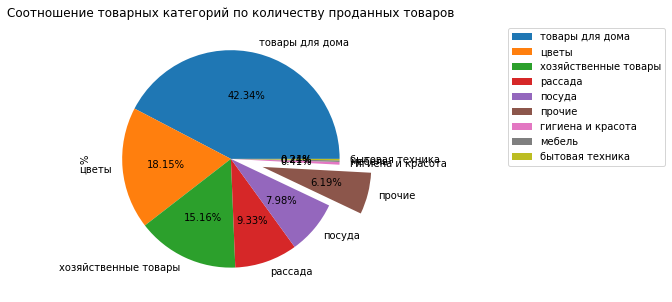

In [42]:
product_category.plot(kind='pie', y='%', figsize=(5,5), autopct='%1.2f%%', explode=(0, 0, 0, 0, 0, 0.3, 0, 0, 0))
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1.0))
plt.title('Соотношение товарных категорий по количеству проданных товаров')
plt.show()

Посмотрим, сохранится ли такое же распределение категорий по выручке

In [43]:
product_category_revenue = df.groupby('product_category').agg({'revenue':'sum'}).sort_values(by='revenue', ascending=False)
product_category_revenue['%'] = product_category_revenue['revenue']/sum(df['revenue'])*100
product_category_revenue

,revenue,%
product_category,,
товары для дома,1848188.0,44.621022
хозяйственные товары,1338713.0,32.320707
цветы,379269.0,9.156736
посуда,214398.0,5.176236
прочие,147724.0,3.566518
рассада,101081.0,2.440411
мебель,70526.0,1.702718
бытовая техника,26863.0,0.648557
гигиена и красота,15205.0,0.367096


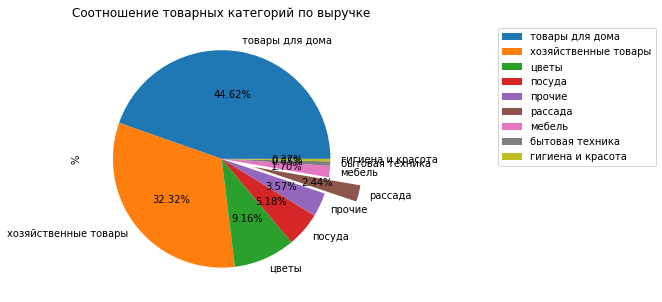

In [44]:
product_category_revenue.plot(kind='pie', y='%', figsize=(5,5), autopct='%1.2f%%', explode=(0, 0, 0, 0, 0, 0.3, 0, 0, 0))
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1.0))
plt.title('Соотношение товарных категорий по выручке')
plt.show()

Наибольшую выручку приносят магазину товары для дома (45% всей выручки) и хозяйственные товары (32%). Наименьшая выручка - у товаров из категории "гигиена и красота" (0,4%). Теперь посмотрим, как товарные категории распределены в заказах, что с чем покупают. Для этого сгуппируем по заказам и товарным категориям

In [45]:
df.groupby(['order_id', 'product_category'])['revenue'].agg('sum')

order_id  product_category    
12624     цветы                      375.0
13547     рассада                    684.0
14480     рассада                    359.0
14481     цветы                      600.0
14482     цветы                      376.0
14485     цветы                      676.0
14486     цветы                     1880.0
14487     рассада                    514.0
14490     цветы                      750.0
14494     цветы                      752.0
14496     цветы                     1238.0
14497     рассада                    303.0
14498     рассада                    303.0
14499     цветы                      613.0
14500     рассада                    759.0
          цветы                      752.0
14501     цветы                     1014.0
14503     цветы                      376.0
14504     рассада                    404.0
14505     цветы                     1051.0
14507     цветы                      564.0
14509     цветы                      750.0
14510     рассада      

Проанализировав содержание заказов, приходим к выводу, что основным ассортиментм для магазина являются: хозяйственные товары и товары для дома, а также рассада плодовых культур и цветов

### Кластеризация товаров по количеству и ценовой категории

Для сегментации товаров по ценам и количеству проведем кластеризацию . Кластеризация поможет нам выделить группы товаров для разработки дальнейшей системы продвижения. Для этого сначала создадим отдельный файл со следующими столбцами: товар, количество заказов, в которых он встречается, количество купленных товаров за исследуемый период, выручка, средняя цена.

In [46]:
df_clusters = df.pivot_table(index='product', aggfunc= {'order_id':'count', 'quantity':'sum', 'revenue':'sum'}) 
df_clusters.columns = ['order_count', 'quantity', 'revenue']
df_clusters['price_mean'] = df_clusters['revenue'] / df_clusters['quantity']
df_clusters.sample(10)

,order_count,quantity,revenue,price_mean
product,,,,
"Универсальный нож WEBBER из нержавеющей стали Русские мотивы 12,7 см с деревянной ручкой ВЕ-2252D",1,80,3600.0,45.000000
"Рассада Патиссона сорт Диск, кассета по 6шт",2,3,360.0,120.000000
Тарелка суповая ИРИС 21 см J1299 Luminarc,1,8,712.0,89.000000
Окномойка с пластмассовой ручкой 42 см щетка 21 см разборная 57575 1804050,3,3,651.0,217.000000
"Декоративная композиция искуственных цветов Букет Роз три цветка, цвет в ассортименте 85 см",4,19,2026.0,106.631579
Чехол Eurogold Clean Metallic металлизированый с поролоном для досок 110х30-114x34 см C34F3M,2,2,494.0,247.000000
"Наматрасник Wellness WM180, 100% хлопок, 180х200 см, стеганый белый, 4607101067749",1,1,3074.0,3074.000000
Сито WEBBER из нержавеющей стали d = 21 см с пластиковой ручкой ВЕ-7335,1,1,194.0,194.000000
Рассада зелени для кухни Сальвия Оффициналис Иктерина диам. 9 см,1,1,120.0,120.000000


#### Обучение модели кластеризации на основе алгоритма K-Means. Распределение признаков по кластерам

Разделим товары на 5 кластеров. Алгоритм K-Means подбирет их центры и отнесет товары к тому кластеру, чей центр ближе.
Когда расстояние от объектов до центра перестанет снижаться или сокращается несущественно, алгоритм останавливается и зафиксирует разбиение, считая его оптимальным.


In [47]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(df_clusters)
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(x_sc) 
# сохраним метки кластера в поле нашего датасета
df_clusters['cluster'] = labels
# посмотрим на средние значения признаков для кластеров
df_clusters.groupby(['cluster']).mean().T


cluster,0,1,2,3,4
order_count,8.445946,1.0,1.506385,1.549669,45.714286
quantity,36.500000,1000.0,3.336935,1.609272,55.285714
revenue,4146.945946,675000.0,886.279961,6292.463576,14084.428571
price_mean,247.254822,675.0,403.424201,4149.809208,274.175698


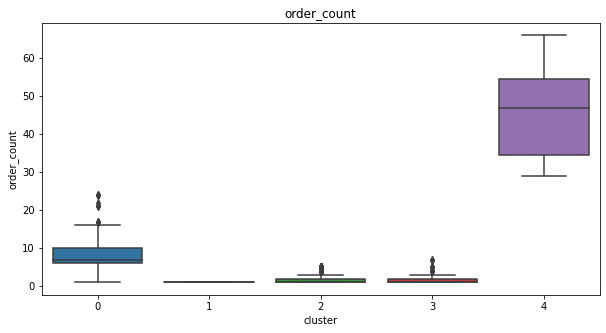

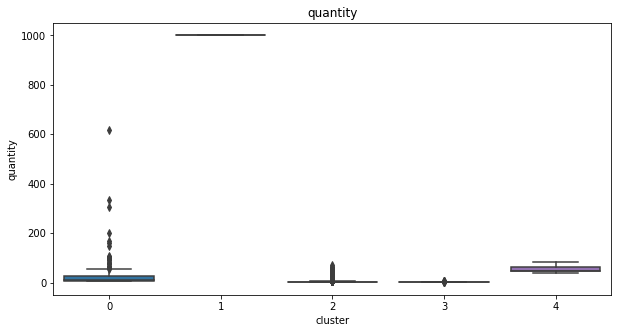

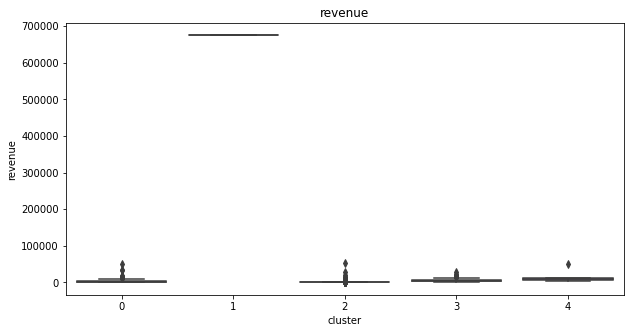

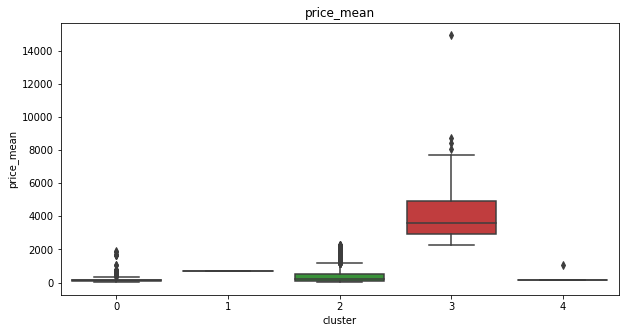

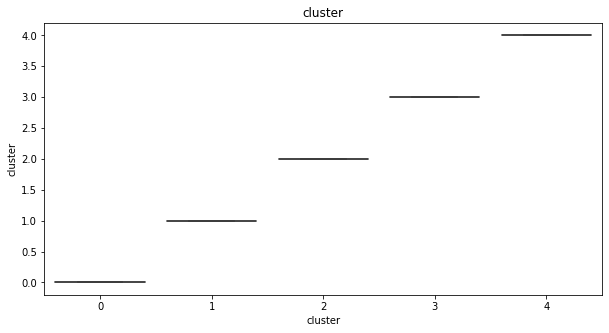

In [48]:
#построим графики распределения для признаков по каждому кластеру
 
for col in df_clusters.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df_clusters, x='cluster', y=col)
    plt.title(col)
    plt.show()


Таким образом, получили следующие кластеры:
1. **Кластер 0:** сюда вошли товары, которые за указанный период купили около 8 раз, всего было куплено чуть более 36 штук, общая выручка составила чуть более 4 тыс.руб., а средняя цена около 247 руб./шт.
2. **Кластер 1** формирует товар, который встречается только в одном заказе в количестве 1000 шт. Можно предположить, что это те самые вантузы, которые были закуплены оптовиком, мы их анализировали чуть выше.
3. **Кластер 2** за анализируемый период товар встречается в 1-2 заказах, куплено около 3 единиц товара, средняя цена чуть более 400 руб. и общая выручка не более 900 руб.
4. **Кластер 3:** аналогично предыдущему кластеру составляют товары, которые редко покупаются, но в отличие от Кластера 2 это более дорогие товары: выручка чуть более 6 тыс.руб., средняя цена за единицу значительно выше средней более 4 тыс руб.
5. **Кластер 4** - это товары-локомотивы. Их покупали чаще всего (более 45 заказов за период, более 55 шт. куплено), выручка от реазизации наибольшая из всех кластеров (более 14 тыс.руб.), но цена за единицу незначительная (в среднем 274 руб.). Именно на эти товары и стоит делать ставку.

## Проверка статистических гипотез

### Статистическая значимость различий в выручке от реализации в выходные и будние дни

**Нулевая гипотеза** (Н0) - средняя выручка от продаж в выходные и будние дни одинакова. 
**Альтернативная гипотеза** (Н1) - выручка от продаж в выходные и будние дни различается. Для проверки Н0 используем ttest, alpha =5%.

In [49]:
#формируем срез данных
df_weekend = df.query('weekday == [5,6]') 
df_weekday = df.query('weekday != [5,6]') 
weekday_revenue = df_weekday['revenue']
weekend_revenue = df_weekend['revenue']

alpha = 0.05
results = st.ttest_ind(weekday_revenue, weekend_revenue)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.34038247223146134
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно более 34%. Это довольно большая вероятность, чтобы делать вывод о значимом различии между выручкой в будни и выходные. Поэтому делаем вывод, что средняя выручка в выходные дни не отличается от средней выручки в рабочие дни.

### Статистическая значимость различий в выручке от реализации хозяйственных товаров и товаров для дома 

**Нулевая гипотеза** (Н0) - средняя выручка от продаж хозяйственных товаров и товаров для дома одинакова. 
**Альтернативная гипотеза** (Н1) - выручка от продаж хозяйственных товаров и товаров для дома различается. Для проверки Н0 используем ttest, alpha =5%.

In [50]:
hoz_revenue = df[df['product_category'] == 'хозяйственные товары']['revenue']
home_revenue = df[df['product_category'] == 'товары для дома']['revenue']

alpha = 0.05
results = st.ttest_ind(hoz_revenue, home_revenue)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.7392737208864899
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно более 74%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между суммами выручки. Поэтому делаем вывод, что нет значимых различий между выручкой от продажи товаров для дома и выручкой от продажи хозяйственных товаров

### Статистическая значимость различий в выручке от реализации товаров разных кластеров

**Нулевая гипотеза** (Н0) - выручка от продаж товаров нулевого кластера и товаров четвертого кластера одинакова. **Альтернативная гипотеза (Н1)** - выручка от товаров нулевого кластера и товаров четвертого кластера различается. Для проверки Н0 используем ttest, alpha =5%.

In [51]:
cluster0 = df_clusters[df_clusters['cluster'] == 0]['revenue']
cluster4 = df_clusters[df_clusters['cluster'] == 4]['revenue']

alpha = 0.05
results = st.ttest_ind(cluster0, cluster4)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.00029035163701774004
Отвергаем нулевую гипотезу


Получается, что выручка от реализации этих двух групп товаров отличается. Теперь проверим выручку между нулевым и третьим кластером

In [52]:
cluster3 = df_clusters[df_clusters['cluster'] == 3]['revenue']

alpha = 0.05
results = st.ttest_ind(cluster0, cluster3)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.0006622926226696322
Отвергаем нулевую гипотезу


Аналогично выручка от реализации товаров нулевого и третьего кластеров отличается. Теперь проверим выручку между вторым и третьим кластером

In [53]:
cluster2 = df_clusters[df_clusters['cluster'] == 2]['revenue']

alpha = 0.05
results = st.ttest_ind(cluster2, cluster3)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  5.886245277742122e-165
Отвергаем нулевую гипотезу


Делаем вывод, что все кластеры между собой отличаются по выручке, поэтому и компании по продвижению разных групп товаров должны быть разными

## Основные выводы и рекомендации

### Основные выводы

По результатам проведенного анализа делаем следующие основные выводы:
1. Мы располагаем данными за 395 дней (13 месяцев) с 1 октября 2018г. до 31 октября 2019 года.
2. Наибольшее количество товаров продается в период с марта по июнь, т.е. в период весенней уборки домов и подготовки к летнему сезону. Значительное количество товаров было продано в декабре перед Новым Годом. В то же время, наблюдается нехорошая тенденция спада продаж в октябре 2019 года (932 шт.) по сравнению с октябрем 2018 (1554 шт.). 
3. Наибольшая выручка в июне. Скорее всего, это связано с началом дачного сезона.
4. Самый высокий средний чек был в октябре-ноябре 2018 года. И к октябрю 2019 года он медленно снижается (с 1475 руб. до 1090 руб.). Очень нехорошая тенденция, надо будет поработать со средним чеком, например, предлагать людям сопутствующие товары. Количество заказов также снизилось в октябре 2019г. по сравнению с октябрем 2018г. (с 238 до 201). В целом количество заказом стандартно повышается перед Новым Годом и в феврале-апреле
5. Наибольшую выручку магазин получает по вторникам, наименьшую - в субботую Необходимо это будет учитывать при планировании рекламной кампании
6. Бестселлерами по количеству проданных единиц выступают: вешалки-плечики, муляжи фруктов, крепежи и пружины для дверей, щетки-сметки деревянные, ершики
7. Лидером по выручке является вафельная простынь 2000х180. В ТОП-10 товаров по выручке также входят сумки-тележки, вешалки-плечики мягкие, фруктовые муляжи, веники, урны
8. Самые многочисленные категории по количеству проданных товаров - это цветы (18%) и товары для дома (42%). Наименьшее количество товаров было продано в категориях мебель и бытовая техника (по 0,2%).Наибольшую выручку приносят магазину товары для дома (45% всей выручки) и хозяйственные товары (32%). Наименьшая выручка - у товаров из категории "гигиена и красота" (0,4%). 
9. Основным ассортиментм для магазина являются: хозяйственные товары и товары для дома, а также рассада плодовых культур и цветов.
10. В результате товарной кластеризации было выделено 5 кластеров товаров, которые отличаются между собой по средней цене, по проданному количеству, по выручке
11. Нет значимых различий между выручкой от продажи товаров для дома и выручкой от продажи хозяйственных товаров, все кластеры между собой отличаются по выручке, поэтому и компании по продвижению разных групп товаров должны быть разными
12. Средняя выручка в выходные дни не отличается от средней выручки в рабочие дни.


### Рекомендации

1. Проработать пути повышения среднего чека. Например, предлагать людям сопутствующие товары со скидкой. 
2. Проанализировать падение продаж в октябре 2019 года по сравнению с аналогичным периодом 2018 года.
3. Проработать пути повышения конверсии покупателей. Например, делать скидки на 2-ой, 3-й и т.д. заказы. Поработать над сервисом.
4. Планировать рекламные кампании в зависимости от сезона и дня недели.